# Partie 1 : Régression linéaire simple

In [1]:
import pandas as pd

### 1. Recupérer des données et d ́ecouvrir ses principales caractéristiques.

In [2]:
data = pd.read_csv('data/advertising.csv')

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Les observations :
*I. Forme*
- [] Identifier la variable target
- [] Nombre de lignes et de colonnes
- [] Identifier les valeurs manquantes
- [] Types de variables 

*II. Fond*
- [] Visualisation de la variable cible (histogramme/box plot)
- [] Comprendre différentes variables (recherche)
- [] Visualiser les relations: fonctionnalités/cible
- [] Identifier les valeurs aberrantes

In [4]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### 2. Initialiser X (predictors, variable indépendante) par la variable TV et y (cible, variable dépendante).

In [5]:
X = pd.DataFrame(data['TV'])
y = pd.DataFrame(data['Sales'])

In [6]:
X.shape

(200, 1)

In [7]:
y.shape

(200, 1)

### 3. Pourquoi il s’agit d’un problème de régression ?

Parce que la variable cible est *continue*.

### 4. Visualiser la base de données avec matplotlib.

In [8]:
import matplotlib.pyplot as plt

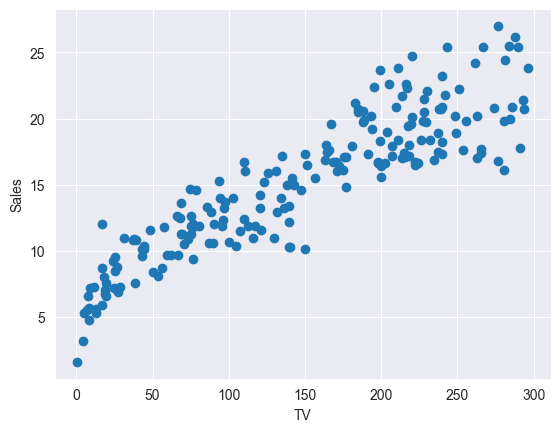

In [9]:
plt.scatter(X, y)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

### 5. Soit le modèle de régression linéaire simple définit par: $y= w0 + w1 x$

#### 5.1. À l’aide de train test split de sklearn.model selection, diviser la base de données en base d’apprentissage et base de test (80% pour la base d’apprentissage et 20% pour la base de test )

In [10]:
import sklearn.model_selection as model_selection

In [11]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [12]:
X_train.head()

,TV
134,36.9
66,31.5
26,142.9
113,209.6
168,215.4


#### 5.2. Définir une fonction MSE(X,y,W) qui retourne la moyenne des erreurs entre la valeur théorique et la valeur réelle. 

In [13]:
import numpy as np

In [21]:
def MSE(X,y,W):
    """
    X : matrice de données
    y : vecteur de valeurs cibles
    W : vecteur de poids
    """
    print(X.shape)
    print(W.shape)
    y_hat = X.dot(W) # y_hat = w0 + w1*x 
    m = X.shape[0] # nombre d'observations
    return 1/(2*m) * np.sum((y_hat - y)**2)

#### 5.3.Définir la fonction Gradient(X,y,W). 

In [22]:
def Gradient(X,y,W):
    """
    X : matrice de données
    y : vecteur de valeurs cibles
    W : vecteur de poids w0 et w1
    """
 
    print(X.shape)
    #print(W.shape)
    
    y_hat = X.dot(W) # y_hat = w0 + w1*x
    m = X.shape[0] # nombre d'observations
    gradient = 1/m * X.T.dot(y_hat - y)

    return gradient

#### 5.4. Etablir une fonction de mise à jour des paramètres W MiseJour(grad,W,alpha).

In [23]:
def MiseJour(grad,W,alpha):
    """
    grad : vecteur de gradient
    W : vecteur de poids w0 et w1
    alpha : taux d'apprentissage
    """
    return W - alpha * grad

#### 5.5. Ecrire la fonction Batch Gradient Descent(X,y,W,N max,alpha,eps), qui retourne les meilleurs paramètres estimés et de plus affiche l’évolution de MSE après chaque itération.

In [24]:
def Batch_Gradient_Descent(X,y,W,N_max,alpha,eps):
    """
    X : matrice de données
    y : vecteur de valeurs cibles
    W : vecteur de poids w0 et w1
    N_max : nombre d'itérations maximum
    alpha : taux d'apprentissage
    eps : seuil de tolérance
    """
    
    W_n= np.array(W) # on transforme W en array
    
    MSE_list = []
    for i in range(N_max):
        # Calcul du gradient
        grad = Gradient(X,y,W)
        
        
        W_n = MiseJour(grad,W,alpha)
        MSE_list.append(MSE(X,y,W_n))
        
        # Si la différence entre deux MSE successifs est inférieure à eps, on arrête
        if i > 0 and abs(MSE_list[i] - MSE_list[i-1]) < eps:
            break
            
    return W_n, MSE_list

#### 5.6. Tester la fonction Batch Gradient Descent(X,y,W,N max,alpha,eps) avec les paramètres suivants: N max = 100, alpha = 0.1, eps = 1e-6.

In [25]:
# Initialiser les pondérations
def init_weights(X):
    """
    X : matrice de données
    """
    return np.zeros((1, X.shape[1]+1))

In [28]:
# Générer les pondérations initiales
w=init_weights(X_train)

In [30]:
b, MSE_list = Batch_Gradient_Descent(X_train,y_train,w,50,0.1,1e-6)

(160, 1)


ValueError: Unable to coerce to DataFrame, shape must be (1, 3): given (1, 2)